In [1]:
# Import the packages we will use
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas
import math

In [2]:
# The following directive activates inline plotting
%matplotlib inline

In [3]:
# 1 or 6 to assign chr
chr_num = 1
chr = 'chr' + str(chr_num)

In [4]:
def plot_HiC(arr, figsize=(15,15)):
    '''
        Plot Hi-С map in blue-red colormap
        Function returns ax to add smth in the figure if needed
    '''
    fig = plt.figure(figsize=figsize)
    ax = fig.add_subplot(111)
    im = ax.matshow(arr, cmap='RdBu_r')
    fig.colorbar(im)
    return ax

In [5]:
loops_info = pandas.read_excel('dicty_loop_positions_Chr1_Chr6.xlsx')
loops_positions = loops_info[loops_info.Chr == chr_num]

loops_x = loops_positions['Genomic bin, Left base'].values
loops_y = loops_positions['Genomic bin, Right base'].values
loops_type = loops_positions['"Extrusion track"'].values
loops_size = loops_positions['Size (Kb)'].values

#### Loops reshaping to one size

In [6]:
def resize_image_arr(original_image, width, height):
    '''
        resizing original image to image with (width, height) size
    '''
    resize_image = np.zeros(shape=(width,height))
    for W in range(width):
        for H in range(height):
            new_width = int( W * original_image.shape[0] / width )
            new_height = int( H * original_image.shape[1] / height )
            resize_image[W][H] = original_image[new_width][new_height]
            
    return resize_image

In [7]:
def z_norm_zero_middle(arr):
    mean = np.mean(arr)
    std = np.std(arr)
    
    z_normed_arr = (arr - mean)/std
    
    norm_arr = z_normed_arr - (np.max(z_normed_arr) + np.min(z_normed_arr))/2
    
    return norm_arr

### Normalized Hi-C

In [8]:
arr = np.load('arrs/2kb_chr'+str(chr_num)+'_norm.npy')

In [9]:
loop_new_size = 100

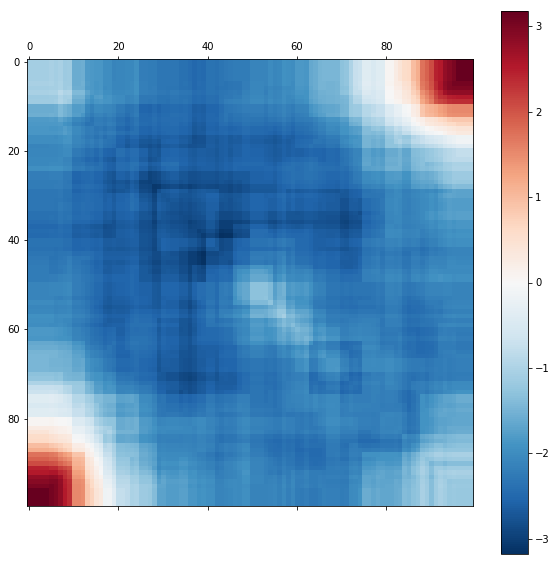

In [10]:
width , height = loop_new_size, loop_new_size
resize_image_sum = np.zeros(shape=(width,height))

for idx, x in enumerate(loops_x): 
    window = 0
    original_image = arr[loops_x[idx]-window:loops_y[idx]+window, loops_x[idx]-window:loops_y[idx]+window]
    resize_image = resize_image_arr(original_image, width, height)

    resize_image[resize_image == -np.inf] = 0
    resize_image = np.nan_to_num(resize_image) 
    
    resize_image_sum = resize_image_sum + resize_image
    
plot_HiC(z_norm_zero_middle(resize_image_sum/loops_x.shape[0]), figsize=(10, 10))

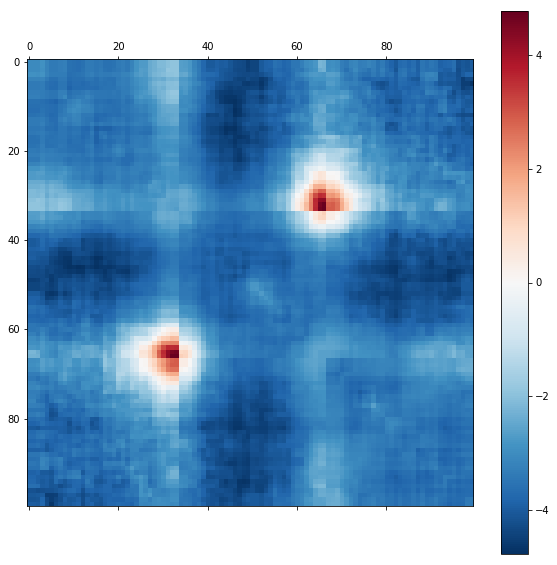

In [11]:
width , height = loop_new_size, loop_new_size
resize_image_sum = np.zeros(shape=(width,height))

for idx, x in enumerate(loops_x): 
    window = loops_y[idx] - loops_x[idx]
    original_image = arr[loops_x[idx]-window:loops_y[idx]+window, loops_x[idx]-window:loops_y[idx]+window]
    resize_image = resize_image_arr(original_image, width, height)

    resize_image[resize_image == -np.inf] = 0
    resize_image = np.nan_to_num(resize_image) 
    
    resize_image_sum = resize_image_sum + resize_image
    
plot_HiC(z_norm_zero_middle(resize_image_sum/loops_x.shape[0]), figsize=(10, 10))

## Calculate mean contact above the distance between bins

In [12]:
def calc_densities_mean(arr):
    '''
        calculate mean of each diagonal of loop
        mean of each diagonal corresponds for the density for each genimic size step
    '''
    density = np.zeros(arr.shape[0])
    for i in range(arr.shape[0]):
        density[i] = np.nanmean(np.diagonal(arr, i))
        
    return density

In [13]:
def calc_densities_sum(arr):
    '''
        calculate mean of each diagonal
        mean of each diagonal corresponds for the density for each genimic size step
    '''
    density = np.zeros(arr.shape[0])
    for i in range(arr.shape[0]):
        density[i] = np.nansum(np.diagonal(arr, i))
        
    return density

In [14]:
def plot_densities(densities):
    fig = plt.figure()
    ax = plt.axes()

    for density in densities:
        plt.plot(np.log(range(density.shape[0])), np.log(density), 'b');
    plt.show()

###### raw data

In [15]:
arr = np.load('arrs/2kb_chr'+str(chr_num)+'.npy')

### loops

###### mean

/anaconda3/envs/loops/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: Mean of empty slice
  
/anaconda3/envs/loops/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


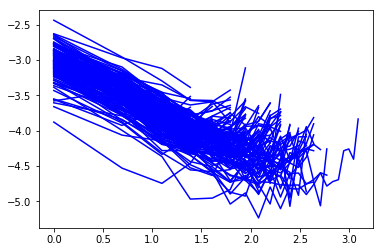

In [16]:
densities = []

for idx, x in enumerate(loops_x):
    loop = arr[x:loops_y[idx], x:loops_y[idx]]
    density = calc_densities_mean(loop)
    densities.append(density)
    
plot_densities(densities)

## Loops plus area after

In [17]:
def calc_densities_loop_plus_add_mean(x,y):
    loop = arr[x:y, x:y]
    density = calc_densities_mean(loop)

    add = np.max(loops_y - loops_x) - (y - x) + 10

    if x-add > 0 and y + add < arr.shape[0]:
        after_loop = np.transpose(arr[y:y+add, x-add:x])
        after_density = np.flip(calc_densities_mean(after_loop))

        d = np.append(density, after_density)
    
        return d
    else:
        return None

single

/anaconda3/envs/loops/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


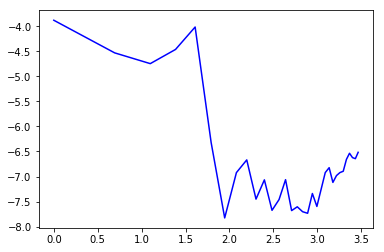

In [18]:
plot_densities([calc_densities_loop_plus_add_mean(loops_x[20], loops_y[20])])

all

/anaconda3/envs/loops/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: Mean of empty slice
  
/anaconda3/envs/loops/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


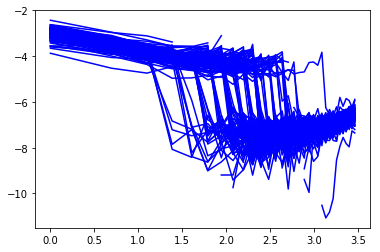

In [19]:
densities = []

for idx, x in enumerate(loops_x):
    y = loops_y[idx]
    d = calc_densities_loop_plus_add_mean(x,y)
    if d is not None: 
        densities.append(calc_densities_loop_plus_add_mean(x,y))

plot_densities(densities)

mean

/anaconda3/envs/loops/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


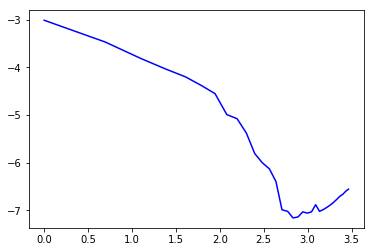

In [20]:
loop_densities_area_mean = np.nanmean(densities, axis=0)
plot_densities([loop_densities_area_mean])

###### sum

/anaconda3/envs/loops/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


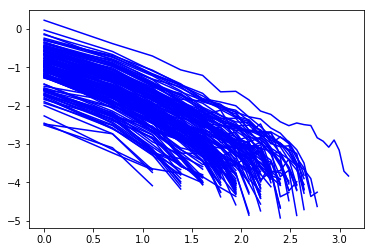

In [21]:
densities = []

for idx, x in enumerate(loops_x):
    loop = arr[x:loops_y[idx], x:loops_y[idx]]
    density = calc_densities_sum(loop)
    densities.append(density)
    
plot_densities(densities)

### Between loops

###### mean

## Plus area after

In [22]:
def calc_densities_btw_plus_add_mean(x,y):
    a = arr[x:y, x:y]
    density = calc_densities_mean(a)

    add = max_btw - (y - x) + 10

    if x-add > 0 and y + add < arr.shape[0]:
        after_a = np.transpose(arr[y:y+add, x-add:x])
        after_density = np.flip(calc_densities_mean(after_a))

        d = np.append(density, after_density)
    
        return d
    else:
        return None

In [23]:
begin = 0
max_btw = 0

for idx in range(0, loops_x.shape[0]-1):
    x = loops_x[idx]
    if begin < x and max_btw < x-begin:
        max_btw = x-begin
    begin = loops_y[idx]
    
print(max_btw)

111


/anaconda3/envs/loops/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: Mean of empty slice
  
/anaconda3/envs/loops/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


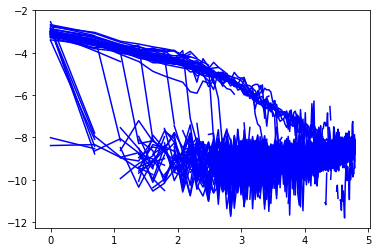

In [24]:
densities = []

begin = 0

for idx in range(0, loops_x.shape[0]-1):
    x = loops_x[idx]
    if begin < x:
        density = calc_densities_btw_plus_add_mean(begin, x)
        if density is not None:
            densities.append(density)  
    begin = loops_y[idx]
    
plot_densities(densities)

In [25]:
btw_densities_area_mean = np.nanmean(densities, axis=0)

/anaconda3/envs/loops/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


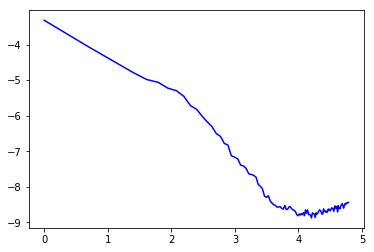

In [26]:
plot_densities([btw_densities_area_mean])

/anaconda3/envs/loops/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.
/anaconda3/envs/loops/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


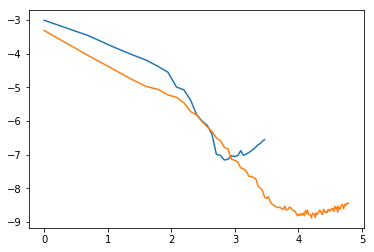

In [27]:
plt.plot(np.log(range(loop_densities_area_mean.shape[0])), np.log(loop_densities_area_mean), label='loop');
plt.plot(np.log(range(btw_densities_area_mean.shape[0])), np.log(btw_densities_area_mean), label='btw');

/anaconda3/envs/loops/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.
/anaconda3/envs/loops/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


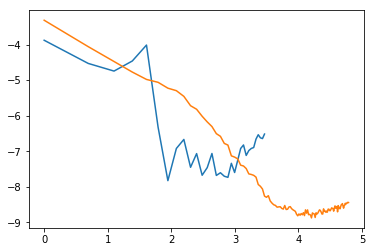

In [28]:
plt.plot(np.log(range(loop_densities_area_mean.shape[0])), np.log(calc_densities_loop_plus_add_mean(loops_x[20], loops_y[20])), label='loop');
plt.plot(np.log(range(btw_densities_area_mean.shape[0])), np.log(btw_densities_area_mean), label='btw');

all

/anaconda3/envs/loops/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: Mean of empty slice
  
/anaconda3/envs/loops/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


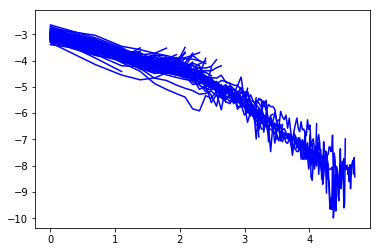

In [29]:
densities = []

begin = 0

for idx, x in enumerate(loops_x):
    if begin < x:
        a = arr[begin:x, begin:x]
        a[a == -np.inf] = 0
        begin = loops_y[idx]
        density = calc_densities_mean(a)
        densities.append(density)
        
plot_densities(densities)

###### sum

/anaconda3/envs/loops/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


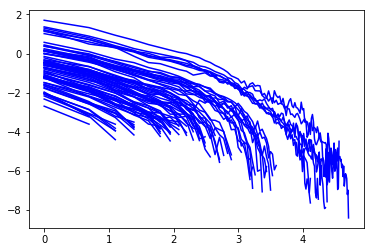

In [30]:
densities = []

begin = 0

for idx, x in enumerate(loops_x):
    if begin < x:
        a = arr[begin:x, begin:x]
        a[a == -np.inf] = 0
        begin = loops_y[idx]
        density = calc_densities_sum(a)
        densities.append(density)
        
plot_densities(densities)

### scaling in one size

###### mean

/anaconda3/envs/loops/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


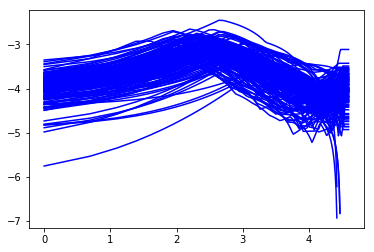

In [31]:
densities = []

width , height = loop_new_size, loop_new_size
resize_image_sum = np.zeros(shape=(width,height))

for idx, x in enumerate(loops_x): 
    original_image = arr[loops_x[idx]:loops_y[idx], loops_x[idx]:loops_y[idx]]
    resize_image = resize_image_arr(original_image, width, height)

    resize_image[resize_image == -np.inf] = 0
    resize_image = np.nan_to_num(resize_image) 
    
    loop = resize_image
    
    density = calc_densities_mean(loop)
    densities.append(density)
    
plot_densities(densities)

###### average

/anaconda3/envs/loops/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log
  del sys.path[0]


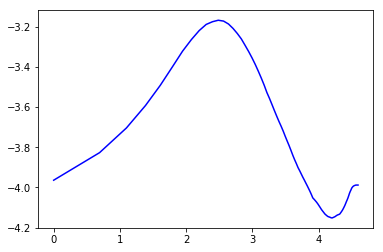

In [32]:
fig = plt.figure()
ax = plt.axes()

sum_density = np.zeros(densities[0].shape[0])

for density in densities:
    sum_density = sum_density + density
    
mean_density = sum_density/len(densities)

np.save('arrs/densities/avg_density_loops_mean_dicty', mean_density)

plt.plot(np.log(range(mean_density.shape[0])), np.log(mean_density), 'b');
plt.show()

###### sum

/anaconda3/envs/loops/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


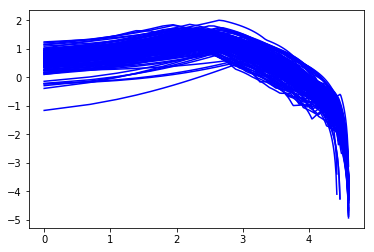

In [33]:
densities = []

width , height = loop_new_size, loop_new_size
resize_image_sum = np.zeros(shape=(width,height))

for idx, x in enumerate(loops_x): 
    original_image = arr[loops_x[idx]:loops_y[idx], loops_x[idx]:loops_y[idx]]
    resize_image = resize_image_arr(original_image, width, height)

    resize_image[resize_image == -np.inf] = 0
    resize_image = np.nan_to_num(resize_image) 
    
    loop = resize_image
    
    density = calc_densities_sum(loop)
    densities.append(density)
    
plot_densities(densities)

###### average

/anaconda3/envs/loops/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log
  del sys.path[0]


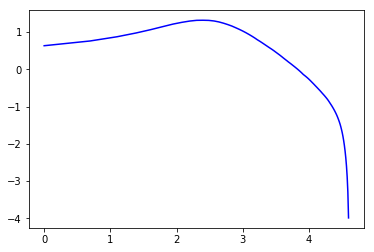

In [34]:
fig = plt.figure()
ax = plt.axes()

sum_density = np.zeros(densities[0].shape[0])

for density in densities:
    sum_density = sum_density + density
    
mean_density = sum_density/len(densities)

np.save('arrs/densities/avg_density_loops_sum_dicty', mean_density)

plt.plot(np.log(range(mean_density.shape[0])), np.log(mean_density), 'b');
plt.show()

### Between loops

###### mean

/anaconda3/envs/loops/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


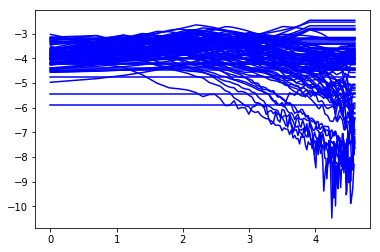

In [35]:
densities = []

begin = 0

width , height = loop_new_size, loop_new_size
resize_image_sum = np.zeros(shape=(width,height))

for idx, x in enumerate(loops_x):
    if begin < x:
        
        original_image = arr[begin:x, begin:x]
        resize_image = resize_image_arr(original_image, width, height)

        resize_image[resize_image == -np.inf] = 0
        resize_image = np.nan_to_num(resize_image) 
    
        a = resize_image
        begin = loops_y[idx]
        density = calc_densities_mean(a)
        densities.append(density)
        
plot_densities(densities)

###### average

/anaconda3/envs/loops/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log
  del sys.path[0]


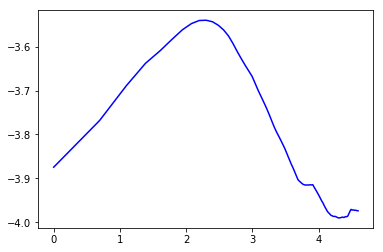

In [36]:
fig = plt.figure()
ax = plt.axes()

sum_density = np.zeros(densities[0].shape[0])

for density in densities:
    sum_density = sum_density + density
    
mean_density = sum_density/len(densities)

np.save('arrs/densities/avg_density_btw_mean_dicty', mean_density)

plt.plot(np.log(range(mean_density.shape[0])), np.log(mean_density), 'b');
plt.show()

###### sum

/anaconda3/envs/loops/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


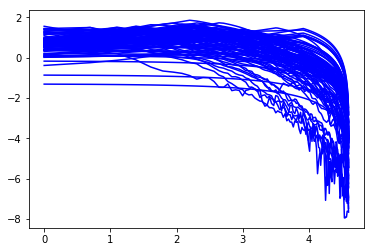

In [37]:
densities = []

begin = 0

width , height = loop_new_size, loop_new_size
resize_image_sum = np.zeros(shape=(width,height))

for idx, x in enumerate(loops_x):
    if begin < x:
        
        original_image = arr[begin:x, begin:x]
        resize_image = resize_image_arr(original_image, width, height)

        resize_image[resize_image == -np.inf] = 0
        resize_image = np.nan_to_num(resize_image) 
    
        a = resize_image
        begin = loops_y[idx]
        density = calc_densities_sum(a)
        densities.append(density)
        
plot_densities(densities)

###### average

/anaconda3/envs/loops/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log
  del sys.path[0]


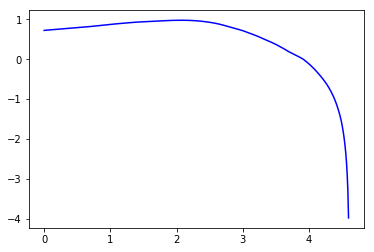

In [38]:
fig = plt.figure()
ax = plt.axes()

sum_density = np.zeros(densities[0].shape[0])

for density in densities:
    sum_density = sum_density + density
    
mean_density = sum_density/len(densities)

np.save('arrs/densities/avg_density_btw_sum_dicty', mean_density)

plt.plot(np.log(range(mean_density.shape[0])), np.log(mean_density), 'b');
plt.show()